<a href="https://colab.research.google.com/github/pajjurigit/aiml/blob/main/LowcodeAI_chap4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats #imports stats module from scipy library
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [2]:
url="https://github.com/maabel0712/low-code-ai/blob/main/advertising_2023.csv?raw=true"

advertising_df=pd.read_csv(url, index_col=0)

advertising_df.head() #displays first five rows of the data frame

,digital,TV,radio,newspaper,sales
1,345.15,156.0,37.8,69.2,22.1
2,66.75,46.0,39.3,45.1,10.4
3,25.80,18.3,45.9,69.3,9.3
4,227.25,145.1,41.3,58.5,18.5
5,271.20,165.2,10.8,58.4,12.9


**Explore Data  -  EDA is the first step in any ML project**


In [3]:
advertising_df.info()
advertising_df.count()
advertising_df.describe()

advertising_df.isnull().sum()
advertising_df.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


False

<Axes: >

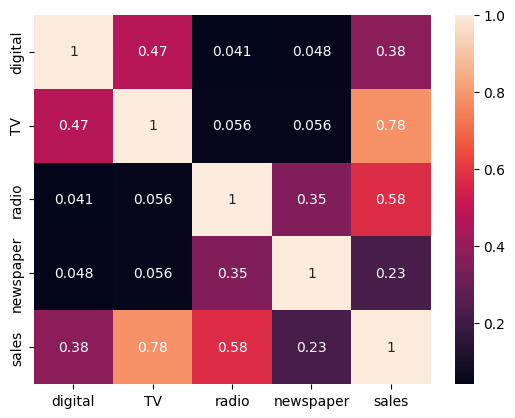

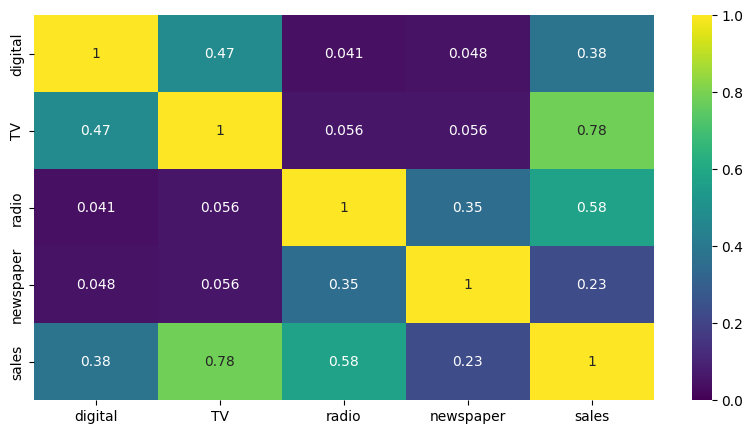

In [4]:
# Heatmap (Correlations)
## Heaptmap shows the relationships (correaltations) between variables (features)


corr = advertising_df.corr()
sns.heatmap(corr, annot=True)

plt.figure(figsize=(10,5))
sns.heatmap(advertising_df.corr(),annot=True,vmin=0,vmax=1,cmap='viridis')



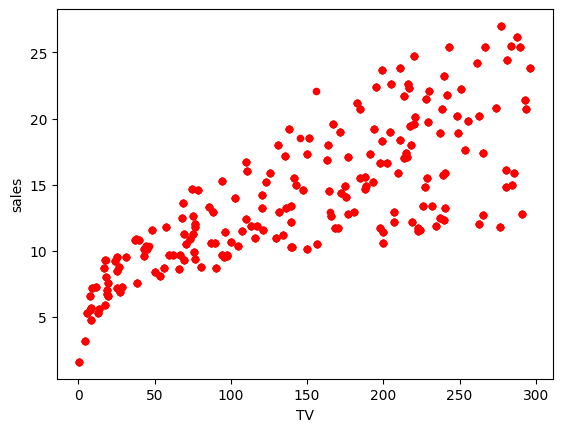

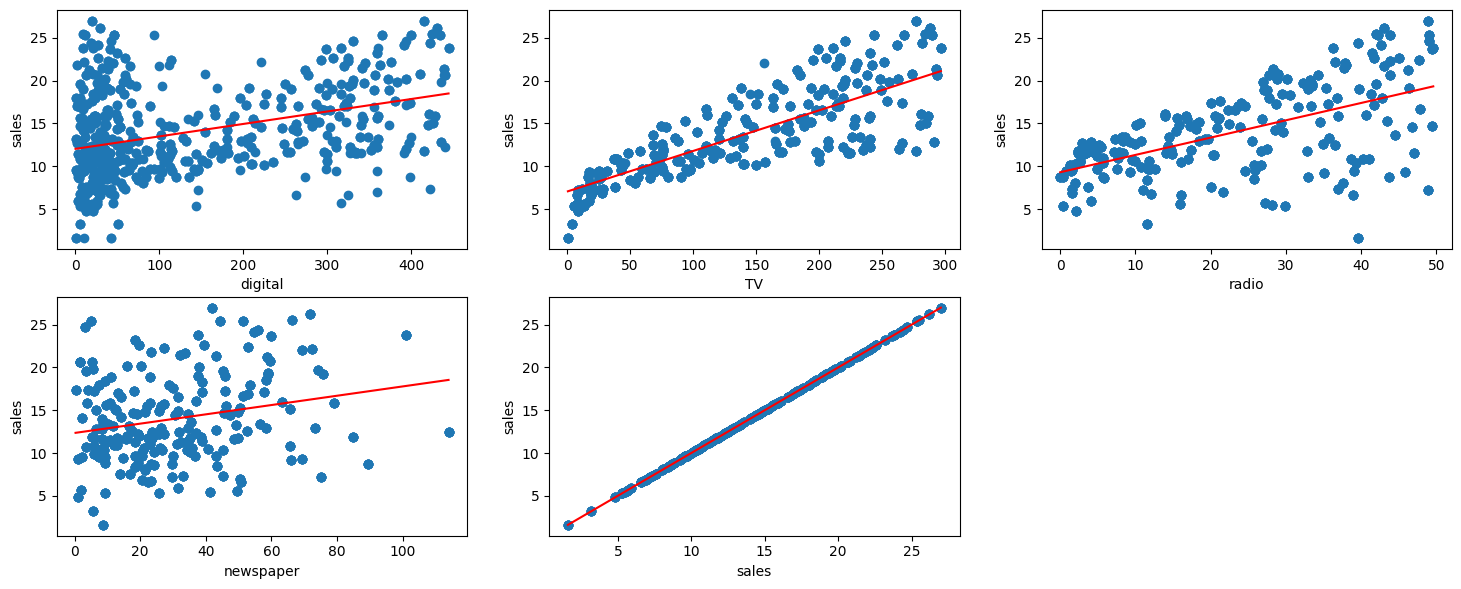

In [5]:
#Scattorplots

advertising_df.plot(kind='scatter',x='TV',y='sales',color='red')

#Scattorplots for each variables
plt.figure(figsize=(18,18))

for i, col in enumerate(advertising_df.columns[0:13]):
  plt.subplot(5, 3, i+1) # each row three figure
  x = advertising_df[col] #x-axis
  y = advertising_df['sales'] #y-axis
  plt.plot(x, y, 'o')
  # Create regression line
  plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)),
           color='red')
  plt.xlabel(col) # x-label
  plt.ylabel('sales') # y-label


In [ ]:
#Histogram Distribuion Plot

sns.displot(advertising_df, x="sales")

lis = ['digital', 'newspaper', 'radio','TV']
plt.subplots(figsize=(15, 8))
index = 1
for i in lis:
  plt.subplot(2, 2, index)
  sns.distplot(advertising_df[i])
  index += 1
  plt.show()

In [10]:
#After Exploring data set - Below code prep data set to export it to AutoML framework (ML model)

import os
if not os.path.isdir("/content/data"):
  os.makedirs("/content/data")

In [11]:
# Converting dataframe to dumping into a csv file
advertising_df.to_csv('/content/data/advertising.csv', encoding='utf-8', index=False)

In [12]:
#check the csv file just created make sure looks ok...
!head /content/data/advertising.csv

digital,TV,radio,newspaper,sales
345.15,156.0,37.8,69.2,22.1
66.75,46.0,39.3,45.1,10.4
25.8,18.3,45.9,69.3,9.3
227.25,145.1,41.3,58.5,18.5
271.2,165.2,10.8,58.4,12.9
13.05,8.7,48.9,75.0,7.2
86.25,57.5,32.8,23.5,11.8
180.3,120.2,19.6,11.6,13.2
12.9,8.6,2.1,1.0,4.8
